<a href="https://colab.research.google.com/github/NaveenShetter1/Machine-Leaning-Notebooks/blob/main/LinearRegressionbyRobustscaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# linear regression model

In [25]:
# importing libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
df=pd.read_csv('/content/sample_data/advertising.csv')

In [29]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [30]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [31]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


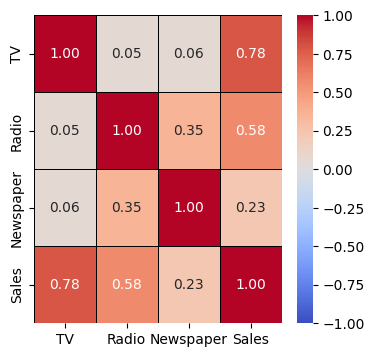

In [32]:
plt.figure(figsize=(4,4))

sns.heatmap(df.corr(),cmap='coolwarm',linewidth=0.5,linecolor='black',annot=True,cbar=True,vmin=-1,vmax=+1,fmt=".2f")
plt.show()

In [33]:
# here if you see sales and tv has highest correlation

<Figure size 300x300 with 0 Axes>

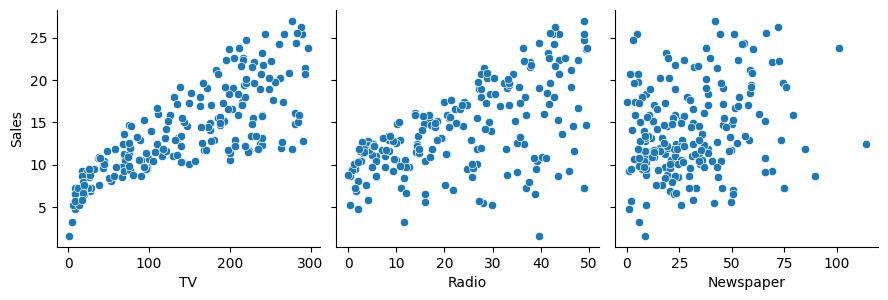

In [34]:
plt.figure(figsize=(3,3))

sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter',height=3)

plt.show()

In [35]:
x=df[['TV']]
y=df[['Sales']]

In [36]:
type(x)

pandas.core.frame.DataFrame

In [37]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [38]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [40]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [41]:
# outliers check


In [42]:
from scipy.stats import zscore

In [43]:
df['TV_zscore']=zscore(df['TV'])

In [44]:
df.head()

,TV,Radio,Newspaper,Sales,TV_zscore
0,230.1,37.8,69.2,22.1,0.969852
1,44.5,39.3,45.1,10.4,-1.197376
2,17.2,45.9,69.3,9.3,-1.516155
3,151.5,41.3,58.5,18.5,0.052050
4,180.8,10.8,58.4,12.9,0.394182


In [45]:
df[(df['TV_zscore']>3) | (df['TV_zscore']<-3)]

,TV,Radio,Newspaper,Sales,TV_zscore


In [46]:
# so no outliers

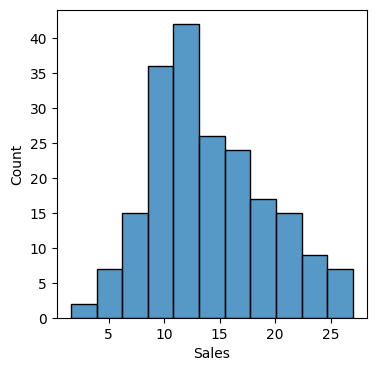

In [47]:
plt.figure(figsize=(4,4))

sns.histplot(x=df['Sales'])

plt.show()

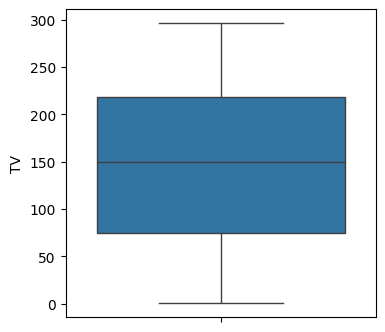

In [48]:
plt.figure(figsize=(4,4))

sns.boxplot(data=df,y=df['TV'])

plt.show()

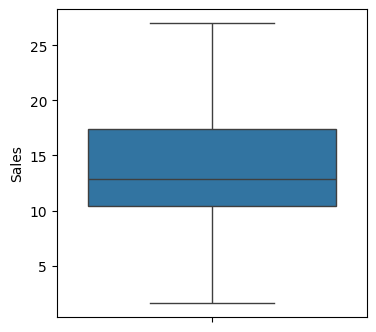

In [49]:
plt.figure(figsize=(4,4))

sns.boxplot(data=df,y=df['Sales'])

plt.show()

In [50]:
# from above we got to know, no outliers

In [51]:
from scipy.stats import skew

In [52]:
skewness=skew(df['Sales'])

In [53]:
skewness

0.4045082487061191

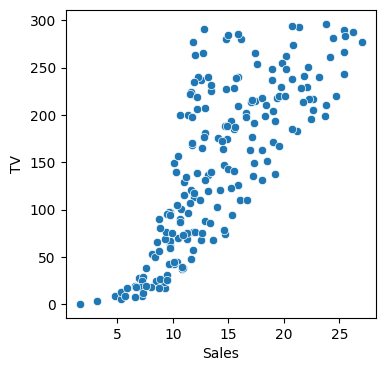

In [54]:
plt.figure(figsize=(4,4))

sns.scatterplot(x=df['Sales'],y=df['TV'])

plt.show()

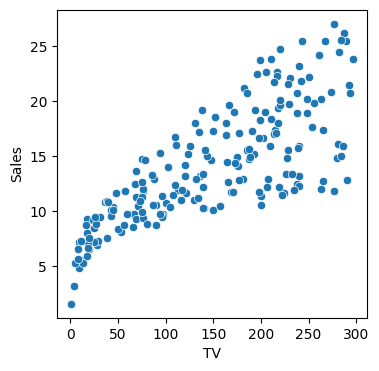

In [55]:
plt.figure(figsize=(4,4))

sns.scatterplot(y=df['Sales'],x=df['TV'])

plt.show()

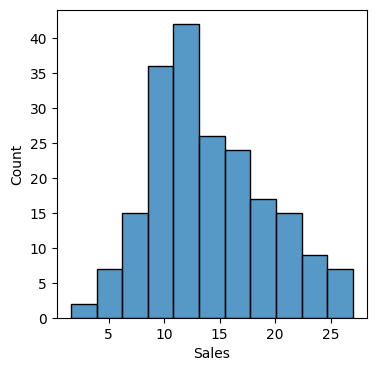

In [56]:
plt.figure(figsize=(4,4))

sns.histplot(x=df['Sales'])

plt.show()

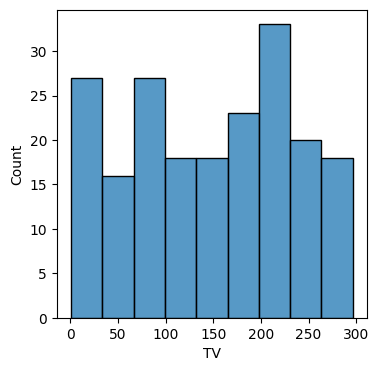

In [57]:
plt.figure(figsize=(4,4))

sns.histplot(x=df['TV'])

plt.show()

In [58]:
skewness_TV=skew(df['TV'])

In [59]:
skewness_TV

-0.06932836662244649

In [60]:
# so very less skewness so by histplot also we can see

In [61]:
# we need to split the data

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
x_train.shape

(160, 1)

In [64]:
x_test.shape

(40, 1)

In [65]:
y_train.shape

(160, 1)

In [66]:
y_test.shape

(40, 1)

In [67]:
df.describe()

,TV,Radio,Newspaper,Sales,TV_zscore
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,147.042500,23.264000,30.554000,14.022500,1.221245e-16
std,85.854236,14.846809,21.778621,5.217457,1.002509e+00
min,0.700000,0.000000,0.300000,1.600000,-1.708823e+00
25%,74.375000,9.975000,12.750000,10.375000,-8.485295e-01
50%,149.750000,22.900000,25.750000,12.900000,3.161515e-02
75%,218.825000,36.525000,45.100000,17.400000,8.381955e-01
max,296.400000,49.600000,114.000000,27.000000,1.744029e+00


In [68]:
# if data is normally distributed we will use standardscaler

In [69]:
# if data having skewness we will go by MinMaxScaler

In [70]:
from sklearn.preprocessing import RobustScaler

In [71]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'TV_zscore'], dtype='object')

In [72]:
df.iloc[:,0::3]

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [73]:
rs=RobustScaler()

sc_x_train=rs.fit_transform(x_train)
sc_x_test=rs.transform(x_test)

In [74]:
type(x_train)

pandas.core.frame.DataFrame

In [75]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [76]:
y_pred_test=lr.predict(x_test)

y_pred_train=lr.predict(x_train)

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report,r2_score,root_mean_squared_error

In [78]:
ac_sc=accuracy_score(y_test,y_pred_test)

ValueError: continuous is not supported

In [80]:
# if data is in float format and binary we need to use r2_score or rms instaed of accuracy_score

In [81]:
ac_sc_test=r2_score(y_test,y_pred_test)

In [82]:
print(ac_sc_test)

0.6766954295627076


In [83]:
ac_sc_train=r2_score(y_train,y_pred_train)

In [84]:
print(ac_sc_train)

0.5911667812043272


In [85]:
err_test=root_mean_squared_error(y_test,y_pred_test)

In [86]:
print(err_test)

3.194472431998898


In [87]:
err_train=root_mean_squared_error(y_train,y_pred_train)

In [88]:
print(err_train)

3.256317025565734
